In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Edad(Q1) x Genero(Q2) x Salario(Q25)
# Preguntas:
    # La cantidad representativa de mujeres y de hombres en la muestra
    # La relación existente (?) entre género y salário

In [3]:
# crear df edad, genero y salaroi y unirlos por indice
df_edad = pd.read_csv('../files/df_a_usar_2.csv')
df_edad.head(2)


,Unnamed: 0,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [4]:
# se ha creado nuovamente la 'unnamed', la borramos y comprobamos
df_edad = df_edad.drop(columns = ['Unnamed: 0'])

In [5]:
df_edad.head(2)


,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [6]:
# unnamed ya no está, mantenemos la columna index como tal.
df_edad = df_edad.set_index('index')

df_edad.head(2)

,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,Q13,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [7]:
# hay muchas columnas que no interesan, visualizamos y eliminamos:
list(df_edad.columns)

['time',
 'age',
 'gender',
 'country_q3',
 'education_q4',
 'role_q5',
 'experience_q6',
 'Q8',
 'Q11',
 'Q13',
 'Q15',
 'sector_q20',
 'company_size_q21',
 'Q22',
 'Q23',
 'anual_income_q25',
 'Q26',
 'Q33',
 'Q35',
 'Q41',
 'Q7',
 'Q9',
 'Q12',
 'Q14',
 'Q16',
 'Q17',
 'Q24',
 'Q32',
 'Q34',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_OTHER',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_OTHER',
 'Q27_A_Part_1',
 'Q27_A_Part_2',
 'Q27_A_Part_3',
 'Q27_A_Part_4',
 'Q27_A_Part_5',
 'Q27_A_Part_6',
 'Q27_A_Part_7',
 'Q27_A_Part_8',
 'Q27_A_Part_9',
 'Q27_A_Part_10',
 'Q27_A_Part_11',
 'Q27_A_OTHER',
 'Q28',
 'Q29_A_Part_1',
 'Q29_A_Part_2',
 'Q29_A_Part_3',
 'Q29_A_Part_4',
 'Q29_A_OTHER',
 'Q30_A_Part_1',
 'Q30_A_Part_2',
 'Q30_A_Part_3',
 'Q30_A_Part_4',
 'Q30_A_Part_5',
 'Q30_A_Part_6',
 'Q30_A_Part_7',
 'Q30_A_OTHER',
 'Q31_A_Part_1',
 'Q31_A_Part_2',
 'Q31_A_Part_3',
 'Q31_A_Part_4',
 'Q31_A_Par

In [8]:
# Interesan las columnas que están renombradas, utilizamos drop por indices que es posible ver en el text editor arriba
df_edad.drop(df_edad.drop.iloc[:, 17 : 241], inplace = True, axis = 1)

AttributeError: 'function' object has no attribute 'iloc'

In [47]:
# intentamos con otro metodo
def drop_columns(df_edad):
    df_edad.drop(columns =['Q26', 'Q33', 'Q35', 'Q41', 'Q9',  'Q12',
 'Q14',
 'Q16',
 'Q17',
 'Q24',
 'Q32',
 'Q34',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_OTHER',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_OTHER',
 'Q27_A_Part_1',
 'Q27_A_Part_2',
 'Q27_A_Part_3',
 'Q27_A_Part_4',
 'Q27_A_Part_5',
 'Q27_A_Part_6',
 'Q27_A_Part_7',
 'Q27_A_Part_8',
 'Q27_A_Part_9',
 'Q27_A_Part_10',
 'Q27_A_Part_11',
 'Q27_A_OTHER',
 'Q28',
 'Q29_A_Part_1',
 'Q29_A_Part_2',
 'Q29_A_Part_3',
 'Q29_A_Part_4',
 'Q29_A_OTHER',
 'Q30_A_Part_1',
 'Q30_A_Part_2',
 'Q30_A_Part_3',
 'Q30_A_Part_4',
 'Q30_A_Part_5',
 'Q30_A_Part_6',
 'Q30_A_Part_7',
 'Q30_A_OTHER',
 'Q31_A_Part_1',
 'Q31_A_Part_2',
 'Q31_A_Part_3',
 'Q31_A_Part_4',
 'Q31_A_Part_5',
 'Q31_A_Part_6',
 'Q31_A_Part_7',
 'Q31_A_Part_8',
 'Q31_A_Part_9',
 'Q31_A_OTHER',
 'Q36_A_Part_1',
 'Q36_A_Part_2',
 'Q36_A_Part_3',
 'Q36_A_Part_4',
 'Q36_A_Part_5',
 'Q36_A_Part_6',
 'Q36_A_Part_7',
 'Q36_A_OTHER',
 'Q37_A_Part_1',
 'Q37_A_Part_2',
 'Q37_A_Part_3',
 'Q37_A_Part_4',
 'Q37_A_Part_5',
 'Q37_A_Part_6',
 'Q37_A_Part_7',
 'Q37_A_OTHER',
 'Q38_A_Part_1',
 'Q38_A_Part_2',
 'Q38_A_Part_3',
 'Q38_A_Part_4',
 'Q38_A_Part_5',
 'Q38_A_Part_6',
 'Q38_A_Part_7',
 'Q38_A_Part_8',
 'Q38_A_Part_9',
 'Q38_A_Part_10',
 'Q38_A_Part_11',
 'Q38_A_OTHER',
 'Q39_Part_1',
 'Q39_Part_2',
 'Q39_Part_3',
 'Q39_Part_4',
 'Q39_Part_5',
 'Q39_Part_6',
 'Q39_Part_7',
 'Q39_Part_8',
 'Q39_Part_9',
 'Q39_OTHER',
 'Q40_Part_1',
 'Q40_Part_2',
 'Q40_Part_3',
 'Q40_Part_4',
 'Q40_Part_5',
 'Q40_Part_6',
 'Q40_Part_7',
 'Q40_Part_8',
 'Q40_Part_9',
 'Q40_Part_10',
 'Q40_Part_11',
 'Q40_OTHER',
 'Q42_Part_1',
 'Q42_Part_2',
 'Q42_Part_3',
 'Q42_Part_4',
 'Q42_Part_5',
 'Q42_Part_6',
 'Q42_Part_7',
 'Q42_Part_8',
 'Q42_Part_9',
 'Q42_Part_10',
 'Q42_Part_11',
 'Q42_OTHER',
 'Q27_B_Part_1',
 'Q27_B_Part_2',
 'Q27_B_Part_3',
 'Q27_B_Part_4',
 'Q27_B_Part_5',
 'Q27_B_Part_6',
 'Q27_B_Part_7',
 'Q27_B_Part_8',
 'Q27_B_Part_9',
 'Q27_B_Part_10',
 'Q27_B_Part_11',
 'Q27_B_OTHER',
 'Q29_B_Part_1',
 'Q29_B_Part_2',
 'Q29_B_Part_3',
 'Q29_B_Part_4',
 'Q29_B_OTHER',
 'Q30_B_Part_1',
 'Q30_B_Part_2',
 'Q30_B_Part_3',
 'Q30_B_Part_4',
 'Q30_B_Part_5',
 'Q30_B_Part_6',
 'Q30_B_Part_7',
 'Q30_B_OTHER',
 'Q31_B_Part_1',
 'Q31_B_Part_2',
 'Q31_B_Part_3',
 'Q31_B_Part_4',
 'Q31_B_Part_5',
 'Q31_B_Part_6',
 'Q31_B_Part_7',
 'Q31_B_Part_8',
 'Q31_B_Part_9',
 'Q31_B_OTHER',
 'Q32_B_Part_1',
 'Q32_B_Part_2',
 'Q32_B_Part_3',
 'Q32_B_Part_4',
 'Q32_B_Part_5',
 'Q32_B_Part_6',
 'Q32_B_Part_7',
 'Q32_B_Part_8',
 'Q32_B_Part_9',
 'Q32_B_Part_10',
 'Q32_B_Part_11',
 'Q32_B_Part_12',
 'Q32_B_Part_13',
 'Q32_B_Part_14',
 'Q32_B_Part_15',
 'Q32_B_Part_16',
 'Q32_B_Part_17',
 'Q32_B_Part_18',
 'Q32_B_Part_19',
 'Q32_B_Part_20',
 'Q32_B_OTHER',
 'Q34_B_Part_1',
 'Q34_B_Part_2',
 'Q34_B_Part_3',
 'Q34_B_Part_4',
 'Q34_B_Part_5',
 'Q34_B_Part_6',
 'Q34_B_Part_7',
 'Q34_B_Part_8',
 'Q34_B_Part_9',
 'Q34_B_Part_10',
 'Q34_B_Part_11',
 'Q34_B_Part_12',
 'Q34_B_Part_13',
 'Q34_B_Part_14',
 'Q34_B_Part_15',
 'Q34_B_Part_16',
 'Q34_B_OTHER',
 'Q36_B_Part_1',
 'Q36_B_Part_2',
 'Q36_B_Part_3',
 'Q36_B_Part_4',
 'Q36_B_Part_5',
 'Q36_B_Part_6',
 'Q36_B_Part_7',
 'Q36_B_OTHER',
 'Q37_B_Part_1',
 'Q37_B_Part_2',
 'Q37_B_Part_3',
 'Q37_B_Part_4',
 'Q37_B_Part_5',
 'Q37_B_Part_6',
 'Q37_B_Part_7',
 'Q37_B_OTHER',
 'Q38_B_Part_1',
 'Q38_B_Part_2',
 'Q38_B_Part_3',
 'Q38_B_Part_4',
 'Q38_B_Part_5',
 'Q38_B_Part_6',
 'Q38_B_Part_7',
 'Q38_B_Part_8',
 'Q38_B_Part_9',
 'Q38_B_Part_10',
 'Q38_B_Part_11',
 'Q38_B_OTHER'])
    return df_edad

In [50]:
df_edad.shape
print(f'El df_edad creado tiene {df_edad.shape[0]} filas y {df_edad.shape[1]} columnas.')

El df_edad creado tiene 25973 filas y 17 columnas.


In [111]:
# vemos la cantidad de personas con determinadas edades - intervalos - en la muestra. Se puede observar que la grande mayoria está en un intervalo de los 18 a
# los 24 años. Sendo el intervalo de 25 a 29 años el que comporta mayor cantidad de encuestados. 
pd.value_counts(df_edad['age'])

25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: age, dtype: int64

In [ ]:
# ¿¿ crear nueva columna int con los intevalos de edad ??

In [128]:
# ver relacion entre las categoricas edad, genero y salario
pd.crosstab(index = df_edad['gender'], columns = df_edad['age'], margins = True)


age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+,All
gender,,,,,,,,,,,,
Man,3696,3643,3859,2765,1993,1537,1171,811,509,504,110,20598
Nonbinary,16,13,12,17,7,4,4,3,4,4,4,88
Prefer not to say,60,66,61,34,42,31,24,14,7,10,6,355
Prefer to self-describe,12,9,5,7,7,1,1,0,0,0,0,42
Woman,1117,963,994,618,455,317,175,136,72,35,8,4890
All,4901,4694,4931,3441,2504,1890,1375,964,592,553,128,25973


In [129]:
pd.crosstab(index = df_edad['gender'], columns = df_edad['anual_income_q25'], margins = True)

anual_income_q25,$0-999,"$500,000-999,999","1,000-1,999","10,000-14,999","100,000-124,999","125,000-149,999","15,000-19,999","150,000-199,999","2,000-2,999","20,000-24,999",...,"40,000-49,999","5,000-7,499","50,000-59,999","60,000-69,999","7,500-9,999","70,000-79,999","80,000-89,999","90,000-99,999",">$1,000,000",All
gender,,,,,,,,,,,,,,,,,,,,,
Man,2520,29,789,809,611,337,504,334,461,500,...,586,579,592,462,440,391,339,301,48,12642
Nonbinary,5,0,2,2,5,0,0,3,1,2,...,4,1,2,2,2,5,1,3,3,47
Prefer not to say,61,1,4,8,15,5,4,8,7,5,...,8,6,9,5,6,2,5,7,2,196
Prefer to self-describe,8,0,1,0,2,1,2,0,0,1,...,0,2,2,0,1,1,0,0,1,24
Woman,775,2,173,131,92,36,63,47,106,79,...,90,111,92,82,103,65,46,39,4,2482
All,3369,32,969,950,725,379,573,392,575,587,...,688,699,697,551,552,464,391,350,58,15391


In [139]:
pd.crosstab(index = df_edad['age'], columns = df_edad['anual_income_q25'], margins = True)

anual_income_q25,$0-999,"$500,000-999,999","1,000-1,999","10,000-14,999","100,000-124,999","125,000-149,999","15,000-19,999","150,000-199,999","2,000-2,999","20,000-24,999",...,"5,000-7,499","50,000-59,999","60,000-69,999","7,500-9,999","70,000-79,999","80,000-89,999","90,000-99,999",">$1,000,000",unknow,All
age,,,,,,,,,,,,,,,,,,,,,
18-21,606,2,74,33,7,4,13,1,27,9,...,30,7,7,19,0,1,4,4,3970,4901
22-24,832,0,169,164,19,6,66,7,81,48,...,160,36,19,107,19,16,13,12,2602,4694
25-29,765,4,260,240,55,37,141,32,162,141,...,216,130,83,168,62,56,37,6,1696,4931
30-34,394,4,180,174,124,62,115,49,97,127,...,123,129,124,89,108,84,62,7,815,3441
35-39,270,5,121,114,115,52,100,76,81,93,...,60,121,79,59,81,72,57,8,512,2504
40-44,164,2,79,89,130,48,59,61,48,71,...,33,95,78,43,67,59,47,10,362,1890
45-49,99,6,43,58,91,66,26,55,37,46,...,31,67,77,24,50,31,52,5,234,1375
50-54,87,5,26,38,68,49,27,38,27,16,...,18,50,39,25,26,34,32,0,173,964
55-59,58,4,6,21,56,27,15,27,8,24,...,12,33,27,10,31,19,20,3,88,592


In [10]:
age_gender = pd.DataFrame(df_edad.groupby(['age'])['gender'].value_counts())
age_gender

gender
age   gender                         
18-21 Man                        3696
      Woman                      1117
      Prefer not to say            60
      Nonbinary                    16
      Prefer to self-describe      12
22-24 Man                        3643
      Woman                       963
      Prefer not to say            66
      Nonbinary                    13
      Prefer to self-describe       9
25-29 Man                        3859
      Woman                       994
      Prefer not to say            61
      Nonbinary                    12
      Prefer to self-describe       5
30-34 Man                        2765
      Woman                       618
      Prefer not to say            34
      Nonbinary                    17
      Prefer to self-describe       7
35-39 Man                        1993
      Woman                       455
      Prefer not to say            42
      Nonbinary                     7
      Prefer to self-describe       7
40-44 Man                        1537
      Woman                       317
      Prefer not to say            31
      Nonbinary                     4
      Prefer to self-describe       1
45-49 Man                        1171
      Woman                       175
      Prefer not to say            24
      Nonbinary                     4
      Prefer to self-describe       1
50-54 Man                         811
      Woman                       136
      Prefer not to say            14
      Nonbinary                     3
55-59 Man                         509
      Woman                        72
      Prefer not to say             7
      Nonbinary                     4
60-69 Man                         504
      Woman                        35
      Prefer not to say            10
      Nonbinary                     4
70+   Man                         110
      Woman                         8
      Prefer not to say             6
      Nonbinary                     4

- Frecuencia relativa muestra

In [122]:
# ver la frecuencia relativa por intervalo de edad
df_age_frecuencia_rel =(df_edad['age'].value_counts()/len(df_edad['age']))*100
round(df_age_frecuencia_rel, 0)

25-29    19.0
18-21    19.0
22-24    18.0
30-34    13.0
35-39    10.0
40-44     7.0
45-49     5.0
50-54     4.0
55-59     2.0
60-69     2.0
70+       0.0
Name: age, dtype: float64

In [143]:
df_gender_frecuencia_rel = (df_edad['gender'].value_counts()/len(df_edad['gender']))*100
round(df_gender_frecuencia_rel, 0)

Man                        79.0
Woman                      19.0
Prefer not to say           1.0
Nonbinary                   0.0
Prefer to self-describe     0.0
Name: gender, dtype: float64

In [146]:
df_income_frecuencia_rel = (df_edad['anual_income_q25'].value_counts()/len(df_edad['anual_income_q25']))*100
round(df_income_frecuencia_rel, 0)

unknow              41.0
$0-999              13.0
1,000-1,999          4.0
10,000-14,999        4.0
30,000-39,999        3.0
100,000-124,999      3.0
5,000-7,499          3.0
50,000-59,999        3.0
40,000-49,999        3.0
20,000-24,999        2.0
2,000-2,999          2.0
15,000-19,999        2.0
7,500-9,999          2.0
60,000-69,999        2.0
25,000-29,999        2.0
70,000-79,999        2.0
4,000-4,999          2.0
150,000-199,999      2.0
80,000-89,999        2.0
3,000-3,999          1.0
125,000-149,999      1.0
90,000-99,999        1.0
200,000-249,999      1.0
300,000-499,999      0.0
250,000-299,999      0.0
>$1,000,000          0.0
$500,000-999,999     0.0
Name: anual_income_q25, dtype: float64

- nulos

In [51]:
# vemos si hay valores nulos en las columnas, comprobamos que las columnas de edad y género no hay valores nulos pero sí hay en salário, 10582.
df_edad.isnull().sum()

time                    0
age                     0
gender                  0
country_q3              0
education_q4            0
role_q5                 0
experience_q6           0
Q8                   1033
Q11                  1253
Q13                  1570
Q15                  2219
sector_q20           9648
company_size_q21     9722
Q22                  9847
Q23                 10021
anual_income_q25    10582
Q7                   1032
dtype: int64

In [138]:
# reeplanzar nulos por unknow
df_edad.replace(np.nan, 'unknow', inplace = True)
df_edad['anual_income_q25'].isnull().sum()

0

- unique()

In [65]:
list(np.sort(df_edad['age'].unique()))
# tenemos 11 intervalos/categorias:  de 4 en 4 años de los 18 hasta los 59, otro intervalos 60-69 y el último para edades >= 70 años 

['18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+']

In [66]:
list(np.sort(df_edad['gender'].unique()))
# tenemos 5 categorias de género : masc, fem, nonbinario, prefiere nno contestar y prefiere no descreverse e genero.

['Man', 'Nonbinary', 'Prefer not to say', 'Prefer to self-describe', 'Woman']

In [115]:
pd.value_counts(df_edad['anual_income_q25']).sort_values(ascending = True)
# vemos 26 intervalos de salarios anuales

$500,000-999,999      32
>$1,000,000           58
250,000-299,999       75
300,000-499,999       91
200,000-249,999      177
90,000-99,999        350
125,000-149,999      379
3,000-3,999          380
80,000-89,999        391
150,000-199,999      392
4,000-4,999          456
70,000-79,999        464
25,000-29,999        470
60,000-69,999        551
7,500-9,999          552
15,000-19,999        573
2,000-2,999          575
20,000-24,999        587
40,000-49,999        688
50,000-59,999        697
5,000-7,499          699
100,000-124,999      725
30,000-39,999        741
10,000-14,999        950
1,000-1,999          969
$0-999              3369
Name: anual_income_q25, dtype: int64

In [ ]:
# limpiar intervalos
# utilizar np.where para categorizar y disminuir rangos(??) creando nueva columna, np.where(df_edad['anual_income_q25] > 1.000.000, 'supreme', 'not so supreme.... )

- Nº intervalos categoricos

In [100]:
df_edad.groupby('gender').ngroups, df_edad.groupby('age').ngroups, df_edad.groupby('anual_income_q25').ngroups


(5, 11, 26)

 - Graficos

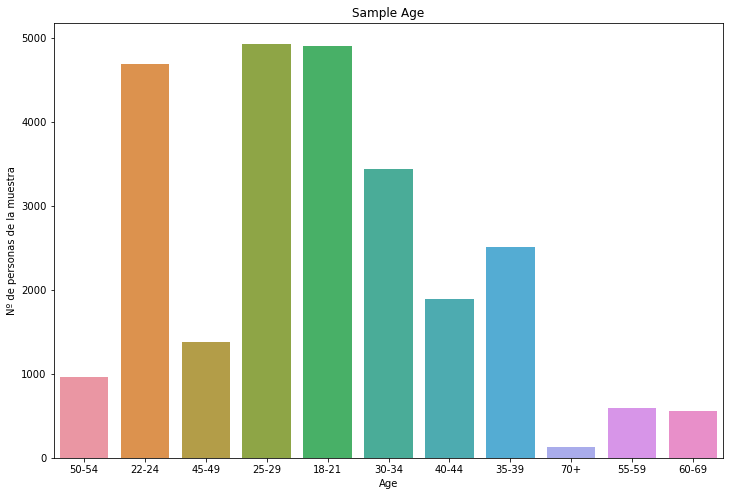

In [86]:
# histograma edad
plt.figure(figsize=(12,8))
fig = sns.countplot(x = 'age', data = df_edad)
fig.set(xlabel = 'Age', ylabel = 'Nº de personas de la muestra')
fig.set_title('Sample Age')
plt.show()

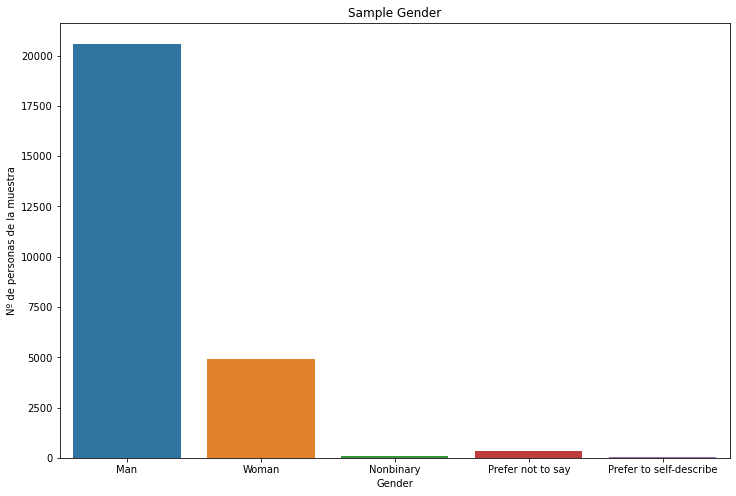

In [87]:
# countplot para visualizar la distribución de genero por la muestra
plt.figure(figsize=(12,8))
fig = sns.countplot(x = 'gender', data = df_edad)
fig.set(xlabel = 'Gender', ylabel = 'Nº de personas de la muestra')
fig.set_title('Sample Gender')
plt.show()

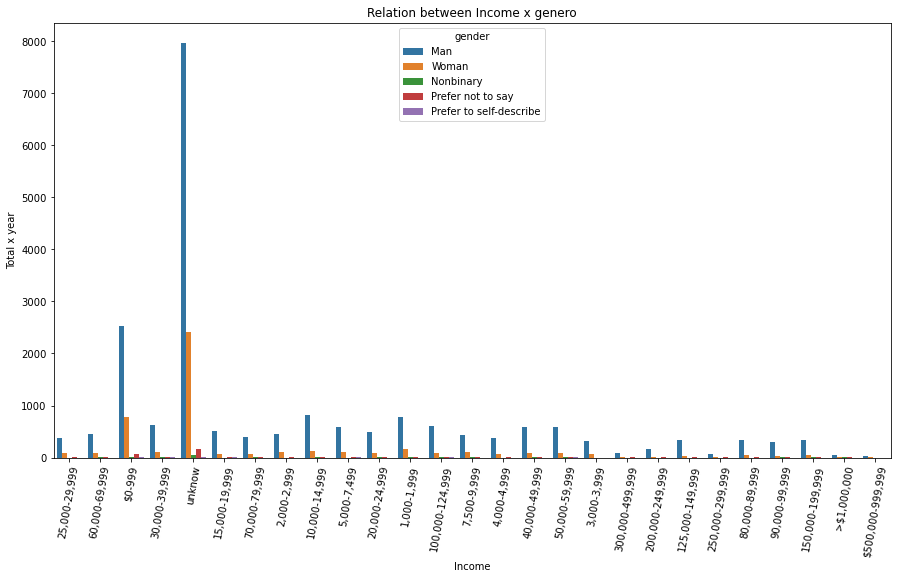

In [148]:
plt.figure(figsize = (15,8))
fig = sns.countplot (x = 'anual_income_q25', data = df_edad, hue = 'gender')
fig.set(xlabel = 'Income', ylabel = 'Total x year')
fig.set_title('Relation between Income x gender')
plt.xticks(rotation = 80);
